#### What is Regression?

Regression analysis is a form of preditive modelling technique which investigates the relationship between a dependant and independant variable.

#### what is Logistic Regression and why?

Logistic Regression produces results in a binary format which is used to predict the outcome of the categorical dependant variable.

So the output should be discrete/categorical.

The Sigmoid curve will translate the values from - Infinity to + Infinity to a finite value(ie. 0 to 1)

#### Data Set Informtaion:::

Loan Id:
Gender:
Married:
Dependant:
Education:
Self_Employed:
ApplicantIncome:
CoApplicantIncome:
Loan_Amount:
Loan_Amount_Term:
Credit_History:
Property_Area:
Loan_Status:

#### Lets Start Now... 
Import all the libraries required.


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
%matplotlib inline

Import the Data Set from the datapath

In [152]:
df=pd.read_csv("C:\\Users\\vragha2x\\Desktop\\Other Docs\\PDS\\Python\\train.csv")

In [156]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [102]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [103]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Out of these columns, (Gender,Male,Dependants,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History) column has Null vallues. 

So we will drop the rows that contains null values..

In [157]:
d=df.dropna()

In [105]:
print("before",df.shape[0])
print("after",d.shape[0])
df.shape[0]-d.shape[0]

before 614
after 480


134

df.shape[0]- tells us the shape of the data set before dropping the null values....
d.shape[0] - tells us the shape of the data set after dropping the null values

Here 0 indicates rows and 1 indicates the columns.

134 rows of null values has been dropped for better results

In [106]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Univariate Analysis

1.Dependants

In [107]:
d.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In the 'Dependants' column, there are only 4 unique values.. ['1','0','2','3+']

2.Applicant Income

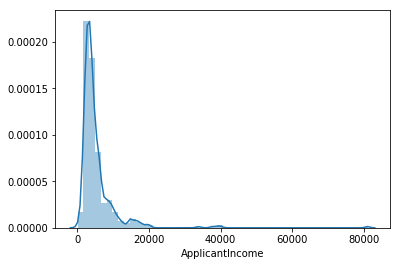

In [108]:
sns.distplot(d.ApplicantIncome)

3.CoApplicant Income

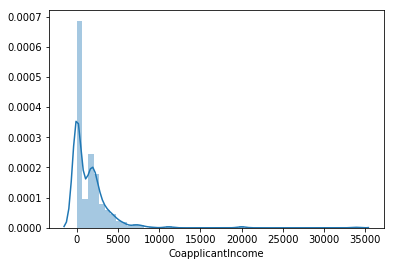

In [109]:
sns.distplot(d.CoapplicantIncome)

4.Loan Amount

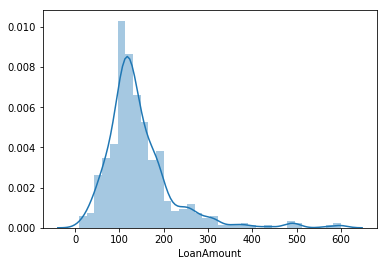

In [110]:
sns.distplot(d.LoanAmount)

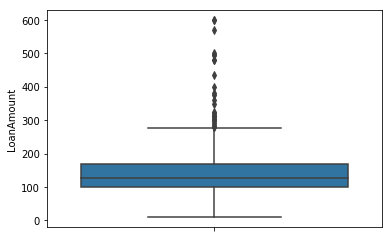

In [22]:
sns.boxplot(y=d.LoanAmount)

The box in the boxplot covers 25% to 75% ie 50% of the data. 

In [23]:
d.LoanAmount.mean()

144.73541666666668

In [24]:
d.LoanAmount.describe()

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

5.Loan Amount term

In [25]:
d.Loan_Amount_Term.unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [26]:
d.Loan_Amount_Term.value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

Majority(85%) of the applicants has gone for 360 months loan term...


Considering Loan_Amount_Term Variable(Looks descrete) is not recommended.. Bcos most of the people are falling under 360

6.Credit History

In [27]:
d.Credit_History.unique()
#d['Credit_History'].unique()

array([1., 0.])

7.Property Area

In [28]:
d.Property_Area.unique()
#d['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

8.Loan Status(Target Variable)

In [29]:
d.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [30]:
d.Loan_Status.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

#### MultiVariate Analysis

In [35]:
# H0:Applicant income is very important. So that may impact the loan status
d.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5730.189189
Y    5201.093373
Name: ApplicantIncome, dtype: float64

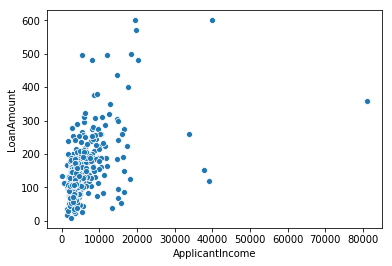

In [36]:
sns.scatterplot(d.ApplicantIncome,d.LoanAmount)

It is found that there are few outliars.. 

And Also if we observe the graph carefully, Loan Amount has been given to the person whose Applicant Income is < 30000..

In [39]:
print('spearmanr:',spearmanr(d.ApplicantIncome,d.LoanAmount)[0])
print('pearsonr:',pearsonr(d.ApplicantIncome,d.LoanAmount)[0])

spearmanr: 0.5212689283368801
pearsonr: 0.49530958608655357


When it is found there are few outliars, going with spearmanr will give better result when compared to pearsonr 

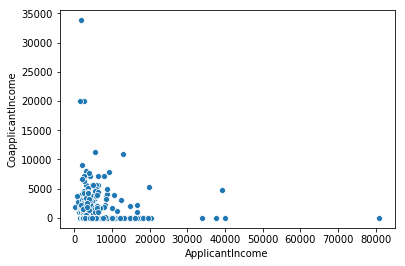

In [74]:
sns.scatterplot(d.ApplicantIncome,d.CoapplicantIncome)

In [111]:
#Creating a new column called 'Total_Income' by combining (Adding) Applicant_Income and CoApplicant_Income
d['Total_Income']=d.ApplicantIncome+d.CoapplicantIncome

C:\Users\vragha2x\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
print('spearmanr:',spearmanr(d.Total_Income,d.LoanAmount)[0])
print('pearsonr:',pearsonr(d.Total_Income,d.LoanAmount)[0])

spearmanr: 0.7050973822248088
pearsonr: 0.55391385474627


spearmanr gives a better result when the incomes are added. 

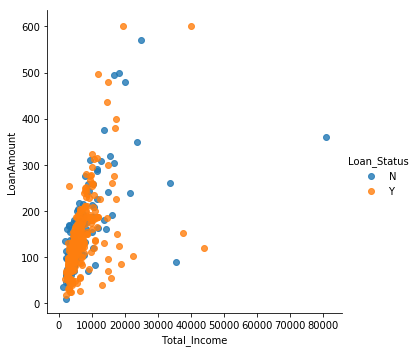

In [49]:
sns.lmplot(x='Total_Income',y='LoanAmount',data=d,hue='Loan_Status',fit_reg=False)

As discussed earlier, Loan Amount is available only for the person whose Total_Income is lesser than 30000

Pearsonr: 0.7014709110110459
Spearmanr: 0.710519017997897


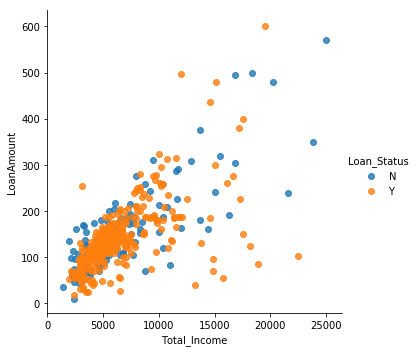

In [54]:
print('Pearsonr:',pearsonr(d[d.Total_Income<30000].Total_Income,d[d.Total_Income<30000].LoanAmount)[0])
print('Spearmanr:',spearmanr(d[d.Total_Income<30000].Total_Income,d[d.Total_Income<30000].LoanAmount)[0])

sns.lmplot(x='Total_Income',y='LoanAmount',data=d[d.Total_Income<30000],hue='Loan_Status',fit_reg=False)

In [58]:
# H0: Self Employed is related to Loan Status
d.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              289
               N              125
Yes            Y               43
               N               23
Name: Loan_Status, dtype: int64

In [60]:
d.groupby('Self_Employed')['Loan_Status'].count()

Self_Employed
No     414
Yes     66
Name: Loan_Status, dtype: int64

In [64]:
d.groupby('Self_Employed')['Loan_Status'].value_counts()/d.groupby('Self_Employed')['Loan_Status'].count()
# To know the probability, we can divide by counts()

Self_Employed  Loan_Status
No             Y              0.698068
               N              0.301932
Yes            Y              0.651515
               N              0.348485
Name: Loan_Status, dtype: float64

In [61]:
#H0: Education and Loan Status are related to each other.. 
d.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              271
              N              112
Not Graduate  Y               61
              N               36
Name: Loan_Status, dtype: int64

In [62]:
d.groupby('Education')['Loan_Status'].count()

Education
Graduate        383
Not Graduate     97
Name: Loan_Status, dtype: int64

In [63]:
d.groupby('Education')['Loan_Status'].value_counts()/d.groupby('Education')['Loan_Status'].count()

Education     Loan_Status
Graduate      Y              0.707572
              N              0.292428
Not Graduate  Y              0.628866
              N              0.371134
Name: Loan_Status, dtype: float64

In [66]:
#H0: Education and Self Employed are related to each other
d.groupby('Education')['Self_Employed'].value_counts()/d.groupby('Education')['Loan_Status'].count()

Education     Self_Employed
Graduate      No               0.861619
              Yes              0.138381
Not Graduate  No               0.865979
              Yes              0.134021
dtype: float64

In [67]:
#H0: Gender and Loan status are related to each other. 
d.groupby('Gender')['Loan_Status'].value_counts()/d.groupby('Gender')['Loan_Status'].count()

Gender  Loan_Status
Female  Y              0.627907
        N              0.372093
Male    Y              0.705584
        N              0.294416
Name: Loan_Status, dtype: float64

In [68]:
#H0: Married and Loan status are related to each other. 
d.groupby('Married')['Loan_Status'].value_counts()/d.groupby('Married')['Loan_Status'].count()


Married  Loan_Status
No       Y              0.621302
         N              0.378698
Yes      Y              0.729904
         N              0.270096
Name: Loan_Status, dtype: float64

In [70]:
#H0: Dependants and Loan Status are related to each other. 
d.groupby('Dependents')['Loan_Status'].value_counts()/d.groupby('Dependents')['Loan_Status'].count()

Dependents  Loan_Status
0           Y              0.682482
            N              0.317518
1           Y              0.650000
            N              0.350000
2           Y              0.764706
            N              0.235294
3+          Y              0.682927
            N              0.317073
Name: Loan_Status, dtype: float64

In [71]:
# To find the mean of the Total Income who has Dependants
d.groupby('Dependents')['Total_Income'].mean()

Dependents
0     6351.507737
1     7755.287500
2     6891.962353
3+    9443.975610
Name: Total_Income, dtype: float64

In [73]:
# To find the mean of the Applicant Income who has Dependants

d.groupby('Dependents')['ApplicantIncome'].mean()

Dependents
0     4768.167883
1     6267.837500
2     5151.529412
3+    8025.512195
Name: ApplicantIncome, dtype: float64

In [75]:
#H0: Property Area and Loan Status are related to each other. 
d.groupby('Property_Area')['Loan_Status'].value_counts()/d.groupby('Property_Area')['Loan_Status'].count()

Property_Area  Loan_Status
Rural          Y              0.611511
               N              0.388489
Semiurban      Y              0.780105
               N              0.219895
Urban          Y              0.653333
               N              0.346667
Name: Loan_Status, dtype: float64

#### Data Cleaning 

In [113]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [158]:
#Making the Data set ordinal:::

def datacleaning(x):
    x.Gender=x.Gender.map(lambda x:1 if x=='Male' else 0) #Assigning 1 if Gender is 'Male' and 0 if Gemder is 'Female'
    x.Married=x.Married.map(lambda x:1 if x=='Yes' else 0) #Assigning 1 if Married is 'Yes' and 0 if Married is 'No'
    x.Dependents=x.Dependents.map(lambda x:3 if x=='3+' else int(x)) #Assigning 3 if Dependents is '3+'' and same values if other than '3+'
    x.Education=x.Education.map(lambda x:1 if x=='Graduate' else 0) #Assigning 1 if Education is 'Graduate' and o if education is 'Not graduate'
    x.Self_Employed=x.Self_Employed.map(lambda x:1 if x=='Yes' else 0) #Assigning 1 if SelfEmployed is 'Yes' and 0 if selfEmployed is 'No'
    dummies=pd.get_dummies(x.Property_Area) #Get Dummies will create columns(=Unique values) and assign 1 and 0. 
    #x=x.join(dummies) #Joining dummies to the dataset
    x["TotalIncome"]=x.ApplicantIncome+x.CoapplicantIncome
    y=x.Loan_Status.map(lambda x:1 if x=='Y' else 0) #Assigning 1 if the Loan status is 'Y' and 0 if the Loan Status is 'N'
    x=x.drop(['Loan_ID','LoanAmount','Loan_Amount_Term','Property_Area','Loan_Status','ApplicantIncome','CoapplicantIncome'],axis=1) #Dropping the unwanted columns from the dataset
    return x,y
   

In [159]:
X,y=datacleaning(d.copy())

In [160]:
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Rural,Semiurban,Urban,TotalIncome
1,1,1,1,1,0,1.0,1,0,0,6091.0
2,1,1,0,1,1,1.0,0,0,1,3000.0
3,1,1,0,0,0,1.0,0,0,1,4941.0
4,1,0,0,1,0,1.0,0,0,1,6000.0
5,1,1,2,1,1,1.0,0,0,1,9613.0
6,1,1,0,0,0,1.0,0,0,1,3849.0
7,1,1,3,1,0,0.0,0,1,0,5540.0
8,1,1,2,1,0,1.0,0,0,1,5532.0
9,1,1,1,1,0,1.0,0,1,0,23809.0
10,1,1,2,1,0,1.0,0,0,1,3900.0


In [117]:
X.Gender.value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [161]:
lr=LogisticRegression()
lr.fit(X,y)

C:\Users\vragha2x\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
#Accuracy Score
lr.score(X,y)

0.8104166666666667

In [163]:
y_hat=lr.predict(X)

In [164]:
c=0
for i,j in zip(y,y_hat):
    if i==j:
        c+=1
print(c/len(y))

0.8104166666666667


In [165]:
accuracy_score(y,y_hat)

0.8104166666666667

In [166]:
y_hat

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [167]:
for i,j in zip(y,y_hat):
    print(i,j)

0 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 1
1 1
1 1
0 0
0 1
0 0
1 1
0 0
1 1
1 1
1 1
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
0 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 0
0 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
0 1
1 1
0 0
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
0 1
0 1
1 1
1 0
1 1
1 1
1 1
0 1
0 0
1 1
1 1
0 1
1 1
0 0
1 1
0 1
1 1
0 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 0
1 1
0 0
0 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
0 1
0 0
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
1 1
1 1
1 1


In [168]:
print(y.value_counts())
confusion_matrix(y,y_hat,labels=[1,0])

1    332
0    148
Name: Loan_Status, dtype: int64


array([[325,   7],
       [ 84,  64]], dtype=int64)

Where as Accuracy Score is (TP+TN)/(TP+FP+FN+TN).. So 389/480 = 0.8104166666666667

In [169]:
# Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

print("precision:",precision_score(y,y_hat)) #Precision = TP/TP+FP.. High precision relates to the low false positive rate
print("recall:",recall_score(y,y_hat)) #Recall(Sensitivity) = TP/TP+FN.. Of all predicted, how many did we label. We have got recall of 0.978 which is good for this model as it’s above 0.5.
print("f1_score:",f1_score(y,y_hat)) #F1 Score = 2*(Recall * Precision) / (Recall + Precision)... F1 is usually more useful than accuracy, especially if you have an uneven class distribution..

precision: 0.7946210268948656
recall: 0.9789156626506024
f1_score: 0.8771929824561404


In [170]:
print(classification_report(y,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.43      0.58       148
           1       0.79      0.98      0.88       332

   micro avg       0.81      0.81      0.81       480
   macro avg       0.85      0.71      0.73       480
weighted avg       0.83      0.81      0.79       480



#### Probability Calibration

In [171]:
lr.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [172]:
lr.predict_proba(X)

array([[0.2659693 , 0.7340307 ],
       [0.26015764, 0.73984236],
       [0.23959745, 0.76040255],
       [0.30798262, 0.69201738],
       [0.26630777, 0.73369223],
       [0.23380383, 0.76619617],
       [0.52023752, 0.47976248],
       [0.22067666, 0.77932334],
       [0.22200642, 0.77799358],
       [0.21254485, 0.78745515],
       [0.25050974, 0.74949026],
       [0.33202253, 0.66797747],
       [0.20519379, 0.79480621],
       [0.30145004, 0.69854996],
       [0.75070771, 0.24929229],
       [0.26745459, 0.73254541],
       [0.72291104, 0.27708896],
       [0.26837636, 0.73162364],
       [0.56370571, 0.43629429],
       [0.18804502, 0.81195498],
       [0.15140889, 0.84859111],
       [0.21285001, 0.78714999],
       [0.27255225, 0.72744775],
       [0.29054004, 0.70945996],
       [0.34256638, 0.65743362],
       [0.15184331, 0.84815669],
       [0.3485497 , 0.6514503 ],
       [0.14550153, 0.85449847],
       [0.34260788, 0.65739212],
       [0.18614332, 0.81385668],
       [0.

In [173]:
pr_pass=lr.predict_proba(X)[:,1]

Calculating the threshold/Saturation point

In [174]:
y_hat_thr=[]
for i in pr_pass:
    if i>0.72:
        y_hat_thr.append(1)
    else:
        y_hat_thr.append(0)
        

Lets calcualte it after setting the Threshold/Saturation

In [175]:
print('Confusion Matrix after setting the Threshold:\n',confusion_matrix(y,y_hat_thr,labels=[1,0]))
print('\n\nClassification report after setting the Threshold:\n',classification_report(y,y_hat_thr))

Confusion Matrix after setting the Threshold:
 [[244  88]
 [ 54  94]]


Classification report after setting the Threshold:
               precision    recall  f1-score   support

           0       0.52      0.64      0.57       148
           1       0.82      0.73      0.77       332

   micro avg       0.70      0.70      0.70       480
   macro avg       0.67      0.69      0.67       480
weighted avg       0.73      0.70      0.71       480



In [176]:
for i,j in zip(lr.coef_[0],X.columns):
    print(i,'*',j,'+')
print("\nIntercept",lr.intercept_[0])

-0.04890779276401766 * Gender +
0.27592886027928964 * Married +
0.08124371318617052 * Dependents +
-0.038292156844044745 * Education +
-0.12844633547360498 * Self_Employed +
2.0339881159511735 * Credit_History +
-0.5044934056070977 * Rural +
0.25466209026201947 * Semiurban +
-0.3555954291034107 * Urban +
-2.9366377907363232e-05 * TotalIncome +

Intercept -0.6054267444484922


Considering the dropped values

In [138]:
d.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            603, 604, 606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64', length=480)

In [139]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [177]:
test_index=df.index.difference(d.index)

In [178]:
test_index

Int64Index([  0,  11,  16,  19,  23,  24,  29,  30,  35,  36,
            ...
            571, 576, 579, 583, 588, 592, 597, 600, 601, 605],
           dtype='int64', length=134)

In [179]:
test=df.loc[test_index]

In [180]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


In [181]:
test.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [182]:
d['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

#### Improvising the model by filling the empty cells....And use it as a Test Data

In [183]:
test.Gender=test.Gender.fillna("Male")
test.Married=test.Married.fillna("Yes")
test.Dependents=test.Dependents.fillna("0")
test.Self_Employed=test.Self_Employed.fillna("No")
test.LoanAmount=test.LoanAmount.fillna(d.LoanAmount.median())
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(d.Loan_Amount_Term.median())
test.Credit_History=test.Credit_History.fillna(1)

In [184]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [185]:
X_test,y_test=datacleaning(test)

In [186]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Rural', 'Semiurban', 'Urban', 'TotalIncome'],
      dtype='object')

In [187]:
lr.score(X_test,y_test)

0.7985074626865671

In [188]:
y_hat_test=lr.predict(X_test)
print(confusion_matrix(y_test,y_hat_test,labels=[1,0]))

[[88  2]
 [25 19]]


Accuracy for the Testing data is 0.7985074626865671

In [189]:
print(confusion_matrix(y,y_hat,labels=[1,0]))

[[325   7]
 [ 84  64]]


Accuracy for the Training data is 0.8104166666666667

In [192]:
#Lets Compare the Precision,Recall,F1-Score of both Training and Testing Data.

print("Train Data:\n",classification_report(y,y_hat))
print("Test Data:\n",classification_report(y_test,y_hat_test))

Train Data:
               precision    recall  f1-score   support

           0       0.90      0.43      0.58       148
           1       0.79      0.98      0.88       332

   micro avg       0.81      0.81      0.81       480
   macro avg       0.85      0.71      0.73       480
weighted avg       0.83      0.81      0.79       480

Test Data:
               precision    recall  f1-score   support

           0       0.90      0.43      0.58        44
           1       0.78      0.98      0.87        90

   micro avg       0.80      0.80      0.80       134
   macro avg       0.84      0.70      0.73       134
weighted avg       0.82      0.80      0.77       134



Setting the Threshold/Saturation Value for the Testing Data

In [194]:
y_hat_test_th=[]
pr_pass_test=lr.predict_proba(X_test)[:,1]
for i  in pr_pass_test:
    if i>0.72:
        y_hat_test_th.append(1)
    else:
        y_hat_test_th.append(0)

In [199]:
#Lets Compare the Precision,Recall,F1-Score of both Training and Testing Data after setting the Threshold value.

print("Train Data after setting the threshold:\n",classification_report(y,y_hat_thr))
print("\nTest Data after setting the threshold:\n",classification_report(y_test,y_hat_test_th))

Train Data after setting the threshold:
               precision    recall  f1-score   support

           0       0.52      0.64      0.57       148
           1       0.82      0.73      0.77       332

   micro avg       0.70      0.70      0.70       480
   macro avg       0.67      0.69      0.67       480
weighted avg       0.73      0.70      0.71       480


Test Data after setting the threshold:
               precision    recall  f1-score   support

           0       0.50      0.61      0.55        44
           1       0.79      0.70      0.74        90

   micro avg       0.67      0.67      0.67       134
   macro avg       0.64      0.66      0.65       134
weighted avg       0.69      0.67      0.68       134



So this model has been trained to 81.4% accuracy with Training Data and tested to 79.8% with Testing Data... 